In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [ ]:
# Combine datasets for consistent preprocessing
test['Survived'] = np.nan  # Add Survived column to test data
combined = pd.concat([train, test], ignore_index=True)

In [ ]:
# Preprocessing
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = combined.select_dtypes(include=['object']).columns
for col in categorical_columns:
    combined[col] = label_encoder.fit_transform(combined[col])

In [ ]:
# Split back into train and test sets
train_processed = combined[~combined['Survived'].isnull()].copy()
test_processed = combined[combined['Survived'].isnull()].copy()

In [ ]:
# Define features and target
X = train_processed.drop(['Survived'], axis=1)
y = train_processed['Survived']

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_val)

# Evaluation
print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy on validation set: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       105
         1.0       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[92 13]
 [23 51]]


In [ ]:
print("Accuracy on validation set:", accuracy_score(y_val, y_pred))


Accuracy on validation set: 0.8100558659217877


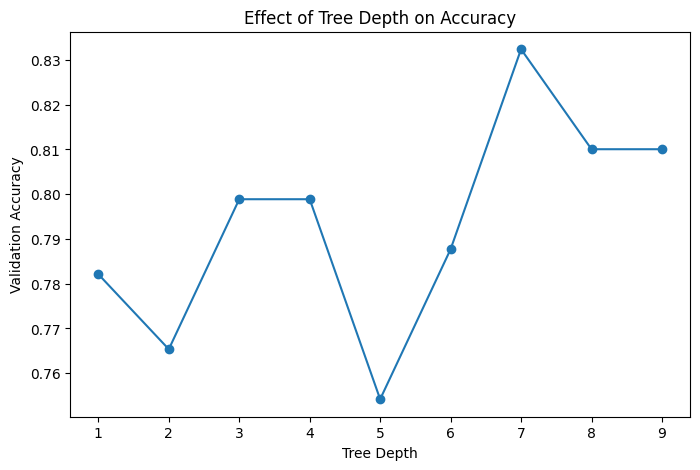

In [ ]:
depths = range(1, 10)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Tree Depth on Accuracy')
plt.show()
